# Linear Regression

This article will provide an in depth overview of the mathematics behind linear and bayesian linear regression and their associated implementations in Python. The implementations will include building the algorithms from scratch as well as using Sci-Kit Learn (sklearn) to reference their pre-built linear regression model. 

### Table of Contents :   
- Introduction to Linear Regression  
    - Requirements of Linear Regression
    - Maximum Likelihood Estimation  
    - Overfitting
    - Linear Regression Implementation  
        - Requirements  
    - Sci-Kit Learn Implementation
- Introduction to Bayesian Linear Regression  
    - Prior Predictions
    - Posterior Distributions
    - Marginal Likelihood
    - Bayesian Linear Regression Implementation  
        - Requirements  
- Concluding Remarks  
- Resources  

## Introduction to Linear Regression
Linear regression is a supervised learning method in machine learning which aims to model the relationship between 1 or more variables. Simple linear regression refers to the exploration between 1 dependent and 1 independent variable, whereas multiple linear regression explores the relationship between 2 or more independent variables and 1 dependent variable. There are many real world applications of linear regression, it is commonly used in time series analysis, optimization, ranking, reinforcement learning, etc. The overall intuition behind linear regression is to fit a line to some dataset, calculate the R^2 and calculate the p-value for the R^2. 

![Figure 1 : Basic Linear Regression](./img/intro.png)

The image above outlines the following, first create a line of best fit across the dataset. Calculate the residual squared (the distance between the observation to the line) and repeat the process while slightly rotating the line each time. You can map the sum of the residuals to the corresponding line of best fit, the line with the lowest residual sum is the best line to model that dataset.

## Requirements of Linear Regression
There are 4 major assumptions of linear regression. These assumptions correspond to the relationship between the input X and Y variables, all 4 of these assumptions must be valid, otherwise the results of the model will be misleading / unreliable.  
**Note:** Residuals refer to the difference between an observed value of the response variable and the value of the response variable predicted from the regression line [2].    
1) Linear Relationship  
    - There exists a linear relationship between the X and Y variables. You can easily validate this assumption through generating a scatter plot. If the resulting graph of your X vs Y variable looks linear, then this assumption is valid. 
2) Independence  
    - Residuals must be independent. The independence of residuals refers to when values at time step i+1 are not independent from values at time step i. You can check the independence of residuals through plotting residuals against time variables. A non random pattern implies that there is a lack of independence.
3) Homoscedasticity  
    - The variance of the errors must not depend on the values of the predictors. This implies that the responses for fixed values of predictors is the same regardless of how large or small the responses are [3].  
4) Normality  
    - The residuals are normally distributed.  

## Maximum Likelihood Estimation
Given a numerical dataset consisting of dependent and independent variable(s) to train the model, we can use maximum likelihood estimation (MLE) for estimating the parameters of a probability distribution. You can interpret this as maximizing the predictive distribution of the training data given the parameters [1]. This is the method we're going to use to fit a line to a given dataset. 

Note : Without going too deep into the mathematics of it, the method of maximum likelihood and the method of ordinary least squares will return the same values of parameters estimated.


## Overfitting
Overfitting in machine learning refers to when a model performs very highly on the dataset it was trained on (observed data) but performs poorly on a dataset it has not yet seen before. This indicates that the model has been overfit to the training data, implying any observations not similar to the initial training set, would yield poor predictions. 

Often to calculate the performance of a regression model, RMSE is used. The formula below [4] outlines how RMSE is calculated :   
![Figure 1 : RMSE](./img/rmse.png)

Here are some recommendations on how to stop a model from overfitting : 
1) Hold out set  
    - Using a train test split (70/30 or 80/20)  
2) Cross validation  
    - We can split our dataset into k groups (k-fold cross-validation). We let one of the groups be the testing set (please see hold-out explanation) and the others as the training set, and repeat this process until each individual group has been used as the testing set (e.g., k repeats). This process is computationally expensive.  
3) Increasing the training data  
    - Introducing new data which the model has not seen before  
4) Feature selection  
    - Selecting the most important features and reducing the noise you're feeding into the model  

## Implementation

In [13]:
import seaborn as sns

In [1]:
import scipy.optimize as opt
import scipy.stats as st
import numpy as np


def log_loss(log_par, data):
    N = len(data)
    a,b = np.exp(log_par)
    logL = N*np.log(a*b) + (a-1)*np.sum(np.log(data)) + (b-1)*np.sum(np.log(1-np.power(data, a)))
    return logL

def mle(data):
    res = opt.minimize(
        fun=lambda log_params, 
        data: - log_loss(log_params, data),
        x0=np.array([0.5, 0.5]), 
        args=(data,),
        method='BFGS'
    )
    a,b = np.exp(res.x)
    return a,b

def query(p, a, b):
    return np.power(1-np.power(1-p, 1/b), 1/a)

uni_sample = st.uniform.rvs(0, 1, 20000)
kumaraswamy_sample = query(uni_sample, 10, 2)

In [7]:
m, b = mle(kumaraswamy_sample)

In [3]:
import matplotlib.pyplot as plt

In [35]:
def func(m,b,x):
    return m*x + b
line_vals = [func(m, b, x) for x in np.arange(0, 1, 0.01)]

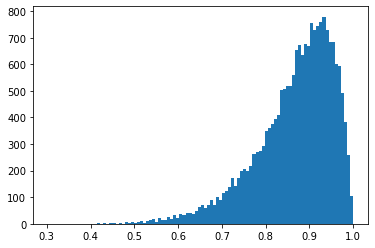

In [39]:
plt.hist(kumaraswamy_sample, bins = 100)
# plt.plot(np.arange(0,1,0.01), line_vals)
plt.show()

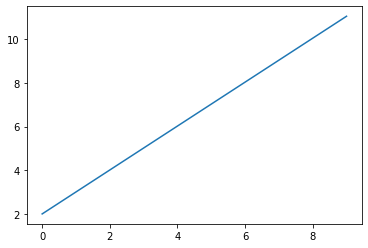

In [34]:
plt.plot(line_vals)

# Bayesian Linear Regression

## Resources
- [1] Deisenroth, Marc Peter, et al. Mathematics for Machine Learning. Cambridge University Press, 2020. https://mml-book.github.io/
- [2] https://nzmaths.co.nz/category/glossary/residual-linear-regression
- [3] https://en.wikipedia.org/wiki/Linear_regression
- [4] https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/